# Loading the Data

In [ ]:
#load dataset from google drive (as I am tired of uploading data manually every time)
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.dropna(inplace=True)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
train_df = X_train.join(y_train)

In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6725,-118.11,34.12,48.0,2476.0,313.0,900.0,303.0,10.6767,<1H OCEAN,500001.0
4440,-118.21,34.08,52.0,3672.0,808.0,3062.0,764.0,2.6806,<1H OCEAN,153000.0
3885,-118.52,34.21,34.0,1663.0,299.0,762.0,282.0,5.1265,<1H OCEAN,211000.0
17615,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,<1H OCEAN,376200.0
5482,-118.46,33.99,41.0,885.0,285.0,562.0,268.0,3.1992,<1H OCEAN,303800.0
...,...,...,...,...,...,...,...,...,...,...
5312,-118.43,34.05,22.0,4251.0,1073.0,1581.0,881.0,5.2555,<1H OCEAN,500001.0
3273,-122.92,39.05,16.0,1548.0,295.0,605.0,250.0,3.5652,INLAND,119000.0
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,<1H OCEAN,218300.0
4663,-118.31,34.05,42.0,443.0,223.0,582.0,223.0,2.2937,<1H OCEAN,350000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

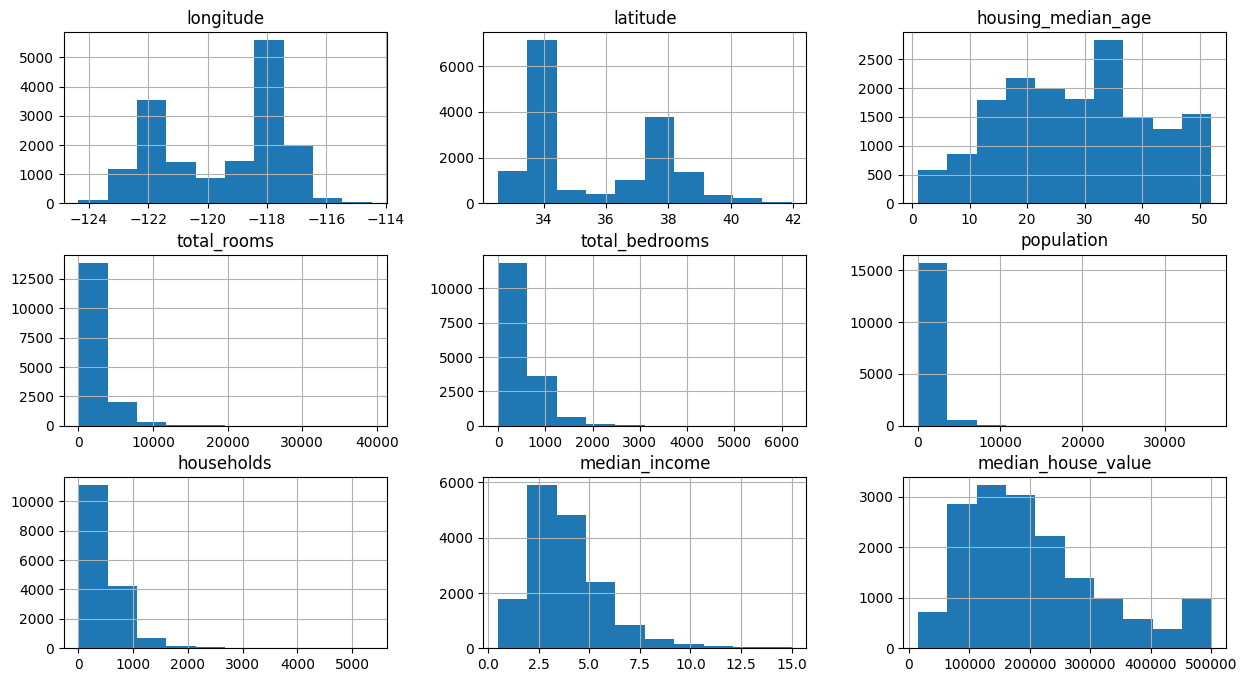

In [ ]:
train_df.hist(figsize=(15,8)) #show histogram

<Axes: >

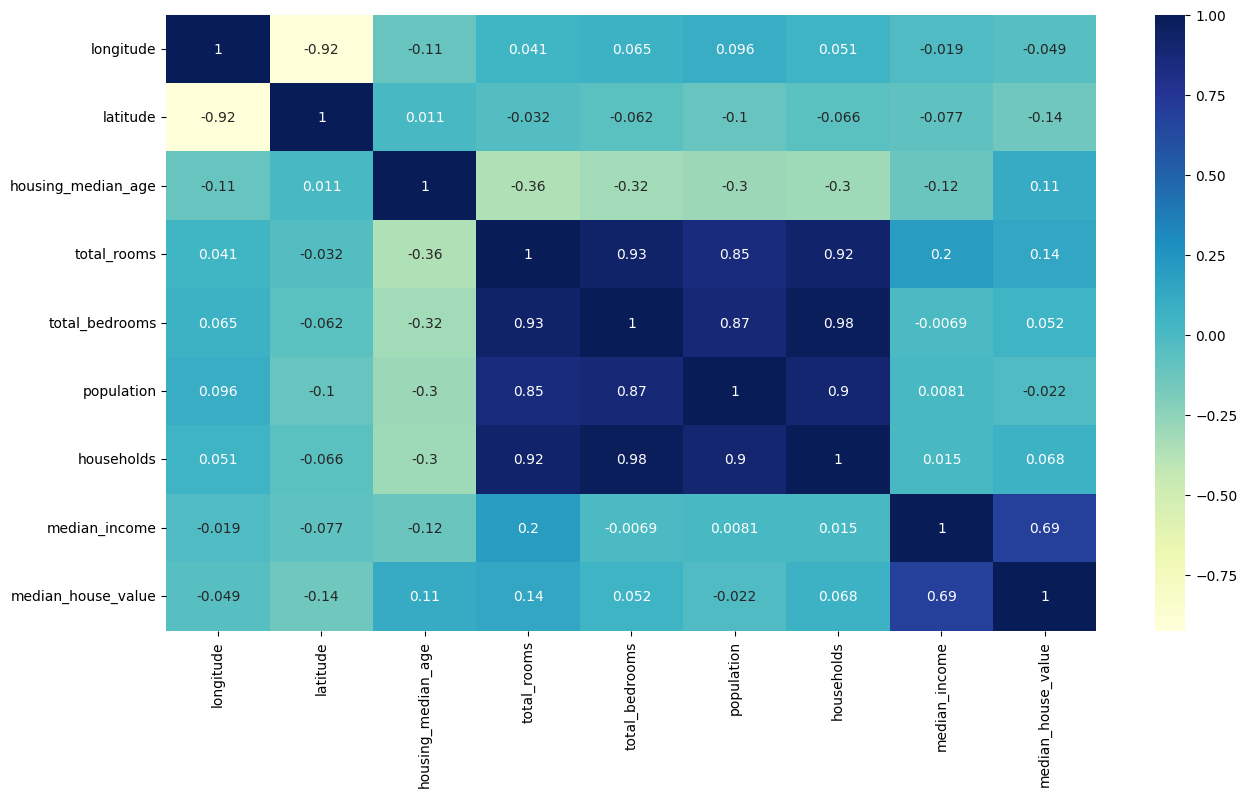

In [ ]:
train_df = train_df.select_dtypes(include=[np.number]) #Drop the ocean_proximity

plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

# Data Preprocessing

In [ ]:
# Feature engineering for training data
train_df['total_rooms'] = np.log(train_df['total_rooms'] + 1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms'] + 1)
train_df['population'] = np.log(train_df['population'] + 1)
train_df['households'] = np.log(train_df['households'] + 1)

In [ ]:
train_df = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

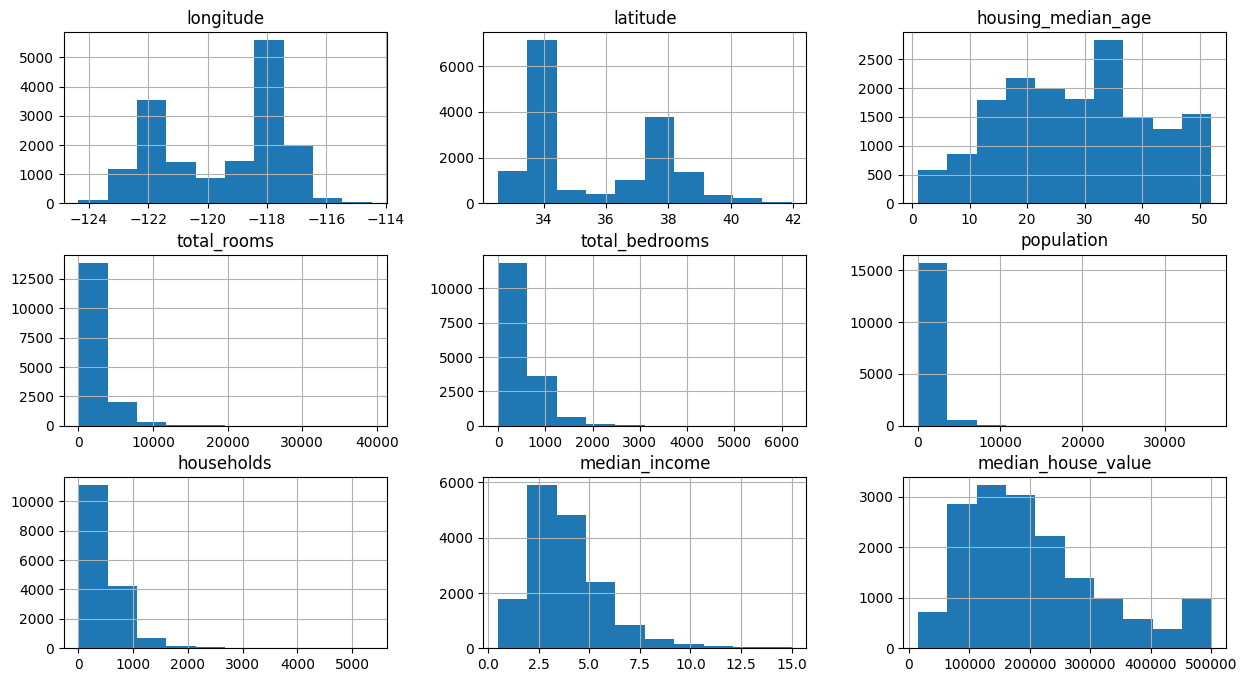

In [ ]:
train_df.hist(figsize=(15,8))

In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6725,-118.11,34.12,48.0,2476.0,313.0,900.0,303.0,10.6767,<1H OCEAN,500001.0
4440,-118.21,34.08,52.0,3672.0,808.0,3062.0,764.0,2.6806,<1H OCEAN,153000.0
3885,-118.52,34.21,34.0,1663.0,299.0,762.0,282.0,5.1265,<1H OCEAN,211000.0
17615,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,<1H OCEAN,376200.0
5482,-118.46,33.99,41.0,885.0,285.0,562.0,268.0,3.1992,<1H OCEAN,303800.0
...,...,...,...,...,...,...,...,...,...,...
5312,-118.43,34.05,22.0,4251.0,1073.0,1581.0,881.0,5.2555,<1H OCEAN,500001.0
3273,-122.92,39.05,16.0,1548.0,295.0,605.0,250.0,3.5652,INLAND,119000.0
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,<1H OCEAN,218300.0
4663,-118.31,34.05,42.0,443.0,223.0,582.0,223.0,2.2937,<1H OCEAN,350000.0


In [ ]:
train_df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7232
INLAND,5195
NEAR OCEAN,2099
NEAR BAY,1815
ISLAND,5


In [ ]:

# Create dummy variables before dropping 'ocean_proximity' from test_data
#test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
train_df = train_df.join(pd.get_dummies(train_df.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
#train_df
# train_df = train_df.join(pd.get_dummies(train_df['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)
# train_df

<Axes: >

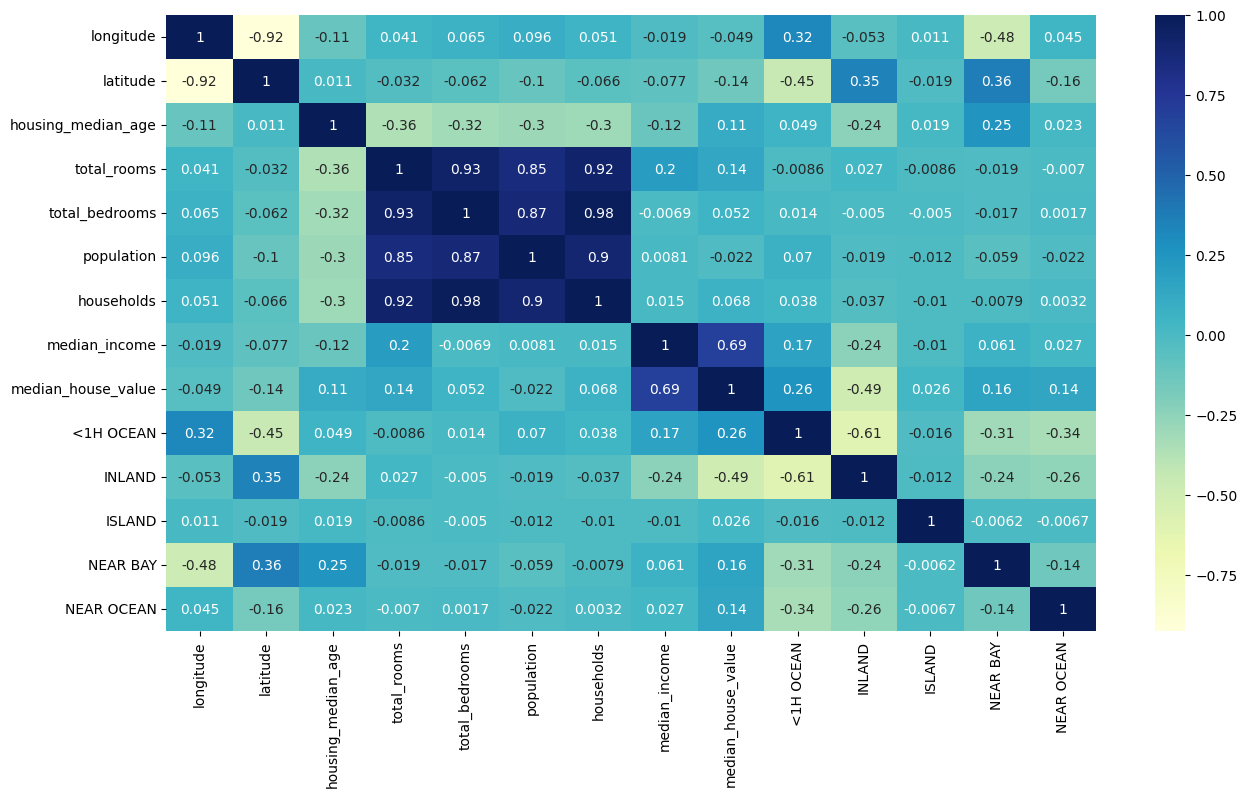

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")  # Show correlation matrix

In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6725,-118.11,34.12,48.0,2476.0,313.0,900.0,303.0,10.6767,500001.0,True,False,False,False,False
4440,-118.21,34.08,52.0,3672.0,808.0,3062.0,764.0,2.6806,153000.0,True,False,False,False,False
3885,-118.52,34.21,34.0,1663.0,299.0,762.0,282.0,5.1265,211000.0,True,False,False,False,False
17615,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,376200.0,True,False,False,False,False
5482,-118.46,33.99,41.0,885.0,285.0,562.0,268.0,3.1992,303800.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,-118.43,34.05,22.0,4251.0,1073.0,1581.0,881.0,5.2555,500001.0,True,False,False,False,False
3273,-122.92,39.05,16.0,1548.0,295.0,605.0,250.0,3.5652,119000.0,False,True,False,False,False
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,218300.0,True,False,False,False,False
4663,-118.31,34.05,42.0,443.0,223.0,582.0,223.0,2.2937,350000.0,True,False,False,False,False


<Axes: xlabel='latitude', ylabel='longitude'>

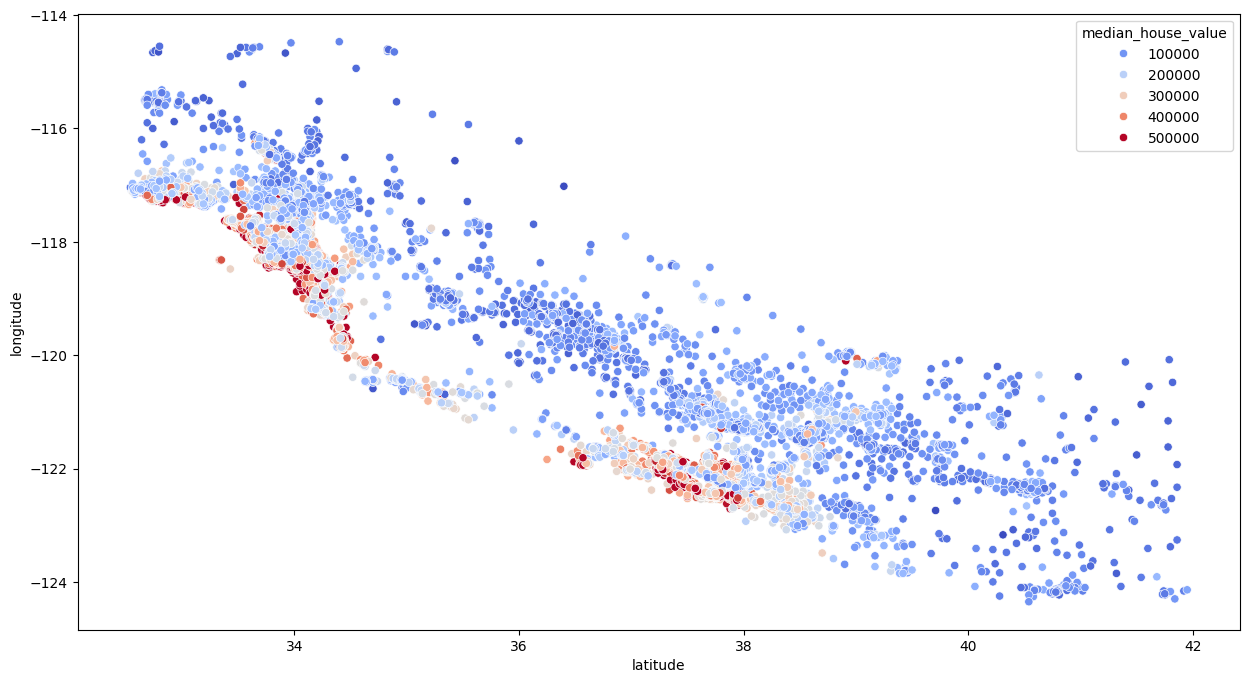

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data = train_df, hue="median_house_value", palette="coolwarm")

# Feature Engineering

In [ ]:
train_df['bedroom_ratio'] = train_df['total_bedrooms']/train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms']/train_df['households']
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6725,-118.11,34.12,48.0,2476.0,313.0,900.0,303.0,10.6767,500001.0,True,False,False,False,False,0.126414,8.171617
4440,-118.21,34.08,52.0,3672.0,808.0,3062.0,764.0,2.6806,153000.0,True,False,False,False,False,0.220044,4.806283
3885,-118.52,34.21,34.0,1663.0,299.0,762.0,282.0,5.1265,211000.0,True,False,False,False,False,0.179796,5.897163
17615,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,376200.0,True,False,False,False,False,0.152766,6.131646
5482,-118.46,33.99,41.0,885.0,285.0,562.0,268.0,3.1992,303800.0,True,False,False,False,False,0.322034,3.302239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,-118.43,34.05,22.0,4251.0,1073.0,1581.0,881.0,5.2555,500001.0,True,False,False,False,False,0.252411,4.825199
3273,-122.92,39.05,16.0,1548.0,295.0,605.0,250.0,3.5652,119000.0,False,True,False,False,False,0.190568,6.192000
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,218300.0,True,False,False,False,False,0.292033,3.750588
4663,-118.31,34.05,42.0,443.0,223.0,582.0,223.0,2.2937,350000.0,True,False,False,False,False,0.503386,1.986547


<Axes: >

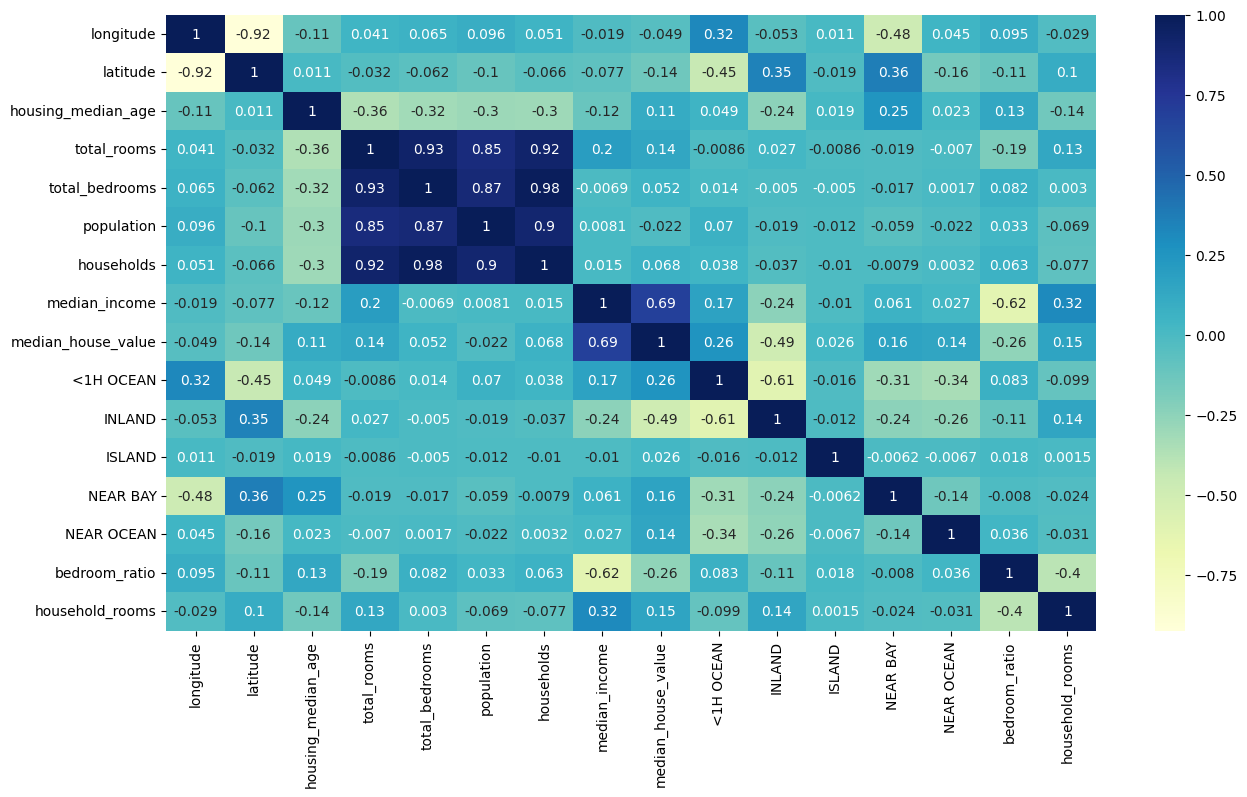

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")  # Show correlation matrix

# Linear Regression

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df['median_house_value']
#X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)
#reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

# Replicate the data 2 times
test_data = pd.concat([test_data]*2, ignore_index=True)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

# Get dummy variables
ocean_proximity_dummies = pd.get_dummies(test_data['ocean_proximity'])

# Ensure 'island' column is present
expected_columns = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
for column in expected_columns:
    if column not in ocean_proximity_dummies.columns:
        ocean_proximity_dummies[column] = False

# Reorder columns to match the expected order
ocean_proximity_dummies = ocean_proximity_dummies[expected_columns]

# Join dummy variables with test_data and drop original 'ocean_proximity' column
test_data = test_data.join(ocean_proximity_dummies).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-117.27,34.16,32.0,7.970740,6.059123,7.049255,6.102559,6.2236,159700.0,False,True,False,False,False,0.760171,1.306131
1,-120.16,34.61,17.0,6.826545,5.247024,6.075346,5.393628,3.0185,500001.0,False,False,False,False,True,0.768621,1.265669
2,-121.46,38.55,40.0,7.639161,6.077642,7.282761,5.955837,2.0074,57000.0,False,True,False,False,False,0.795590,1.282634
3,-118.46,34.07,49.0,7.791110,5.710427,6.746412,5.765191,14.2867,500001.0,True,False,False,False,False,0.732941,1.351405
4,-117.25,33.65,10.0,7.410347,5.758902,6.587550,5.455321,3.5125,155600.0,True,False,False,False,False,0.777143,1.358370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,-122.29,37.56,36.0,6.692084,4.948760,6.100319,4.941642,5.8221,289400.0,False,False,False,True,False,0.739495,1.354223
8170,-124.10,40.50,30.0,7.564238,5.976351,6.904751,5.926926,2.2357,72300.0,True,False,False,False,False,0.790080,1.276250
8171,-120.45,34.87,4.0,7.335634,5.402677,6.302619,5.257495,7.5696,328700.0,True,False,False,False,False,0.736498,1.395272
8172,-118.32,33.73,25.0,7.003065,5.129899,6.011267,5.075174,7.6886,500001.0,False,False,False,False,True,0.732522,1.379867


In [ ]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6725,-118.11,34.12,48.0,2476.0,313.0,900.0,303.0,10.6767,500001.0,True,False,False,False,False,0.126414,8.171617
4440,-118.21,34.08,52.0,3672.0,808.0,3062.0,764.0,2.6806,153000.0,True,False,False,False,False,0.220044,4.806283
3885,-118.52,34.21,34.0,1663.0,299.0,762.0,282.0,5.1265,211000.0,True,False,False,False,False,0.179796,5.897163
17615,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,376200.0,True,False,False,False,False,0.152766,6.131646
5482,-118.46,33.99,41.0,885.0,285.0,562.0,268.0,3.1992,303800.0,True,False,False,False,False,0.322034,3.302239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,-118.43,34.05,22.0,4251.0,1073.0,1581.0,881.0,5.2555,500001.0,True,False,False,False,False,0.252411,4.825199
3273,-122.92,39.05,16.0,1548.0,295.0,605.0,250.0,3.5652,119000.0,False,True,False,False,False,0.190568,6.192000
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,218300.0,True,False,False,False,False,0.292033,3.750588
4663,-118.31,34.05,42.0,443.0,223.0,582.0,223.0,2.2937,350000.0,True,False,False,False,False,0.503386,1.986547


In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test, y_test)
#reg.score(X_test_s, y_test)

-0.780790398415937

# Regression Visualization

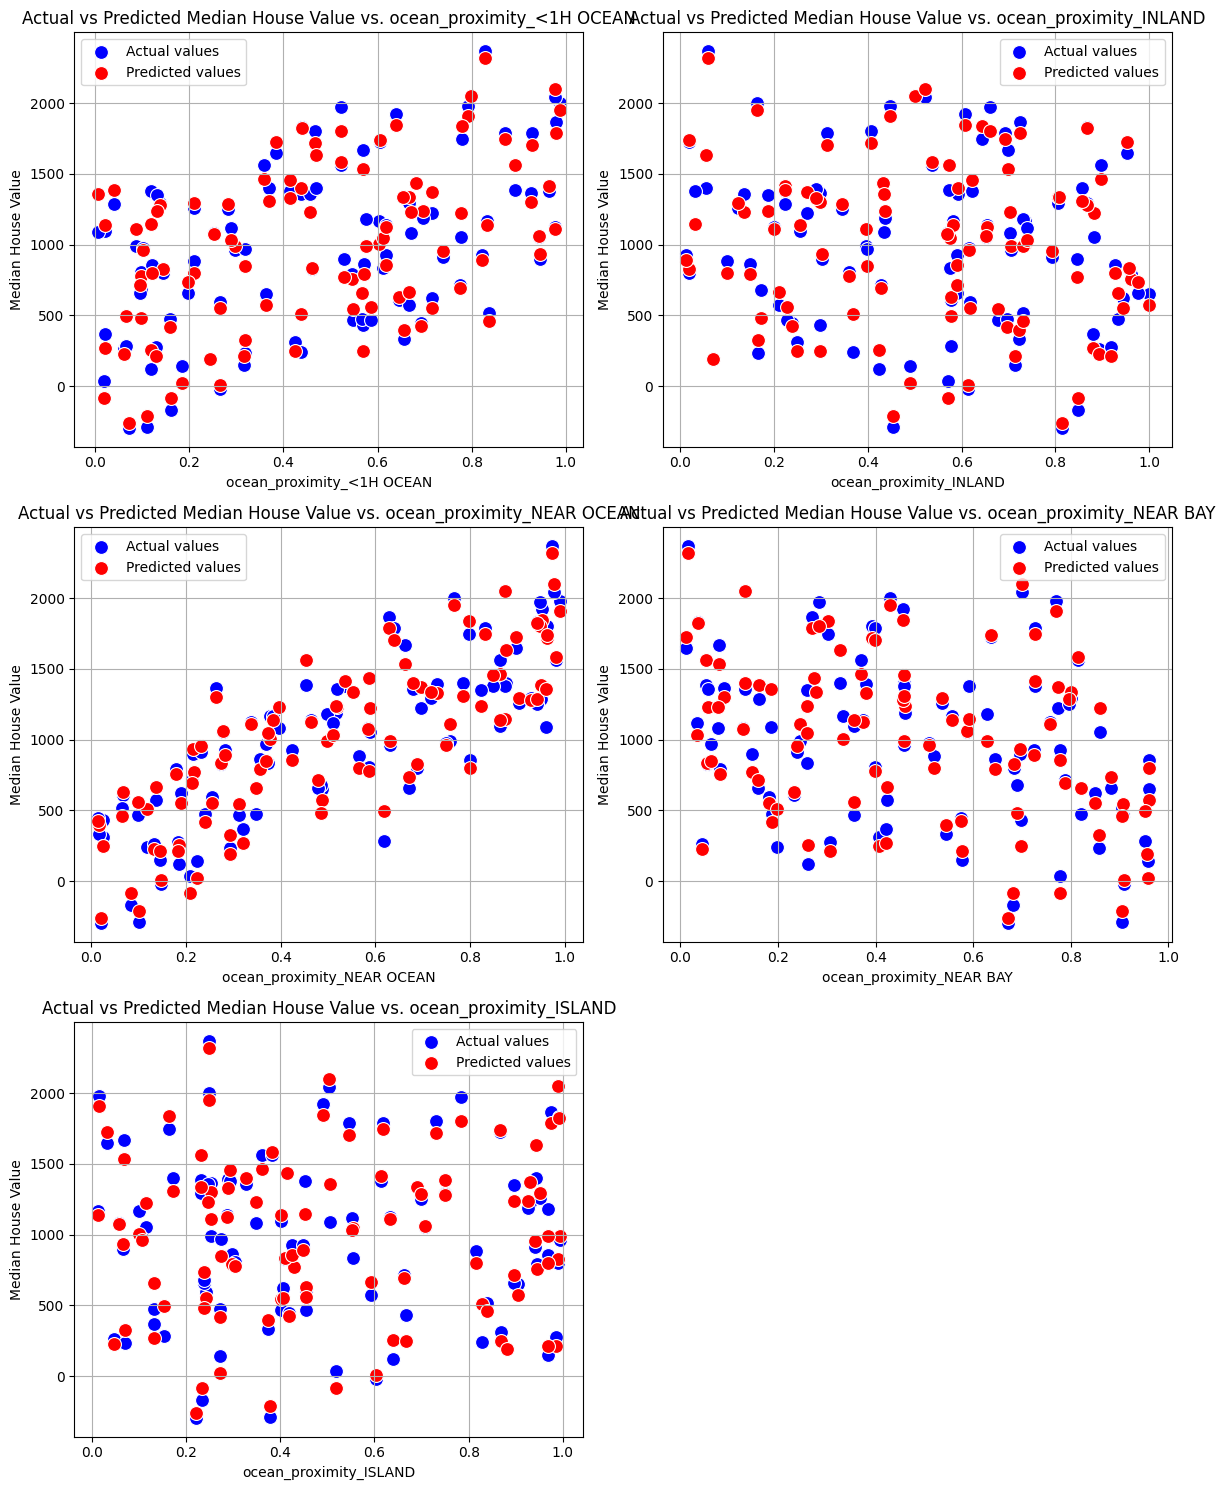

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.linear_model import LinearRegression

 # Example Data Preparation (replace with actual data)
 np.random.seed(0)
 # Assuming `ocean_proximity` has been one-hot encoded into 5 columns
 X_train = pd.DataFrame({
     'ocean_proximity_<1H OCEAN': np.random.rand(100) * 1,
     'ocean_proximity_INLAND': np.random.rand(100) * 1,
     'ocean_proximity_NEAR OCEAN': np.random.rand(100) * 1,
     'ocean_proximity_NEAR BAY': np.random.rand(100) * 1,
     'ocean_proximity_ISLAND': np.random.rand(100) * 1
 })
 y_train = (1000 * X_train['ocean_proximity_<1H OCEAN'] +
            1500 * X_train['ocean_proximity_NEAR OCEAN'] -
            500 * X_train['ocean_proximity_NEAR BAY'] +
            np.random.randn(100) * 100)

 # Fit the model
 reg = LinearRegression()
 reg.fit(X_train, y_train)

 # Predict on train data
 y_train_pred = reg.predict(X_train)

 # Combine features for plotting
 df_train = X_train.copy()
 df_train['Median House Value'] = y_train
 df_train['Prediction'] = y_train_pred

 # Plotting Actual vs. Predicted Values
 num_features = len(X_train.columns)
 ncols = 2
 nrows = int(np.ceil(num_features / ncols))

 plt.figure(figsize=(12, 5 * nrows))

 for idx, feature in enumerate(X_train.columns):
     plt.subplot(nrows, ncols, idx + 1)
     # Plot actual values
     sns.scatterplot(data=df_train, x=feature, y='Median House Value', color='blue', marker='o', s=100, label='Actual values')
     # Plot predicted values
     sns.scatterplot(data=df_train, x=feature, y='Prediction', color='red', marker='o', s=100, label='Predicted values')
     plt.title(f'Actual vs Predicted Median House Value vs. {feature}')
     plt.xlabel(feature)
     plt.ylabel('Median House Value')
     plt.legend()
     plt.grid(True)

 plt.tight_layout()
 plt.show()


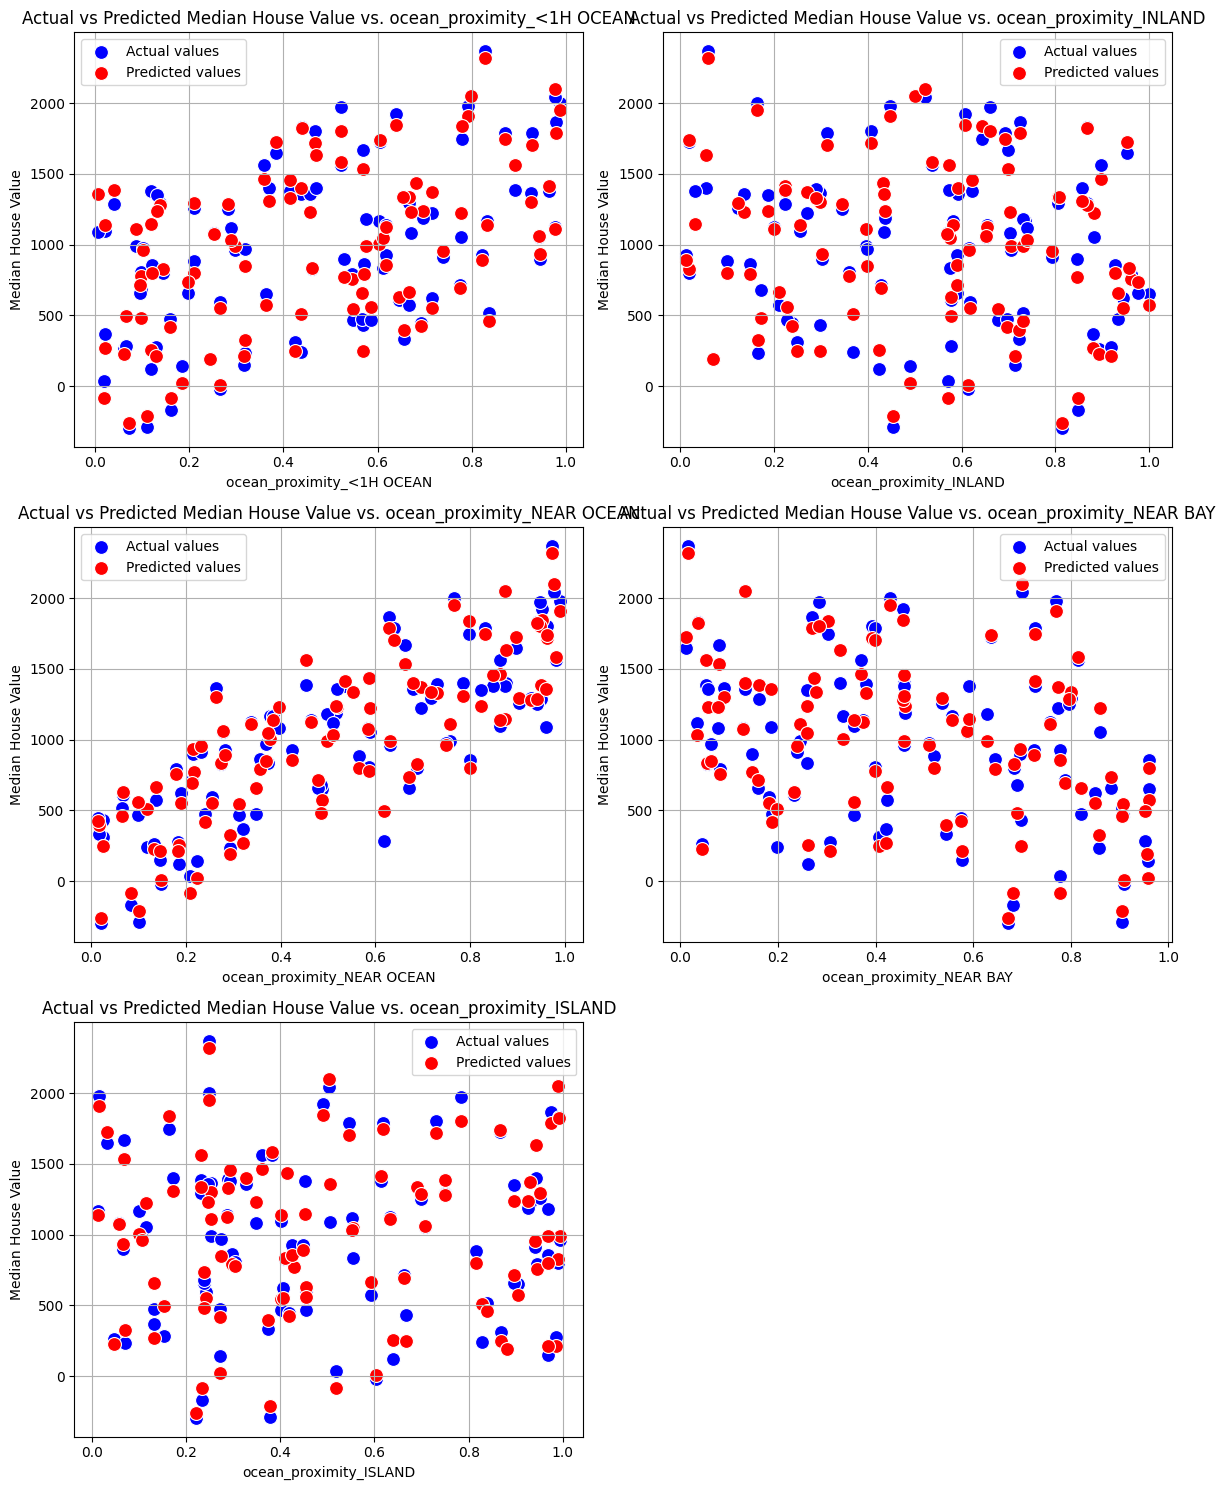

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Example Data Preparation (replace with actual data)
np.random.seed(0)
# Assuming `ocean_proximity` has been one-hot encoded into 5 columns
X_train = pd.DataFrame({
    'ocean_proximity_<1H OCEAN': np.random.rand(100),
    'ocean_proximity_INLAND': np.random.rand(100),
    'ocean_proximity_NEAR OCEAN': np.random.rand(100),
    'ocean_proximity_NEAR BAY': np.random.rand(100),
    'ocean_proximity_ISLAND': np.random.rand(100)
})
y_train = (1000 * X_train['ocean_proximity_<1H OCEAN'] +
           1500 * X_train['ocean_proximity_NEAR OCEAN'] -
           500 * X_train['ocean_proximity_NEAR BAY'] +
           np.random.randn(100) * 100)

# Fit the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on train data
y_train_pred = reg.predict(X_train)

# Combine features for plotting
df_train = X_train.copy()
df_train['Median House Value'] = y_train
df_train['Prediction'] = y_train_pred

# Plotting Actual vs. Predicted Values
num_features = len(X_train.columns)
ncols = 2
nrows = int(np.ceil(num_features / ncols))

plt.figure(figsize=(12, 5 * nrows))

for idx, feature in enumerate(X_train.columns):
    plt.subplot(nrows, ncols, idx + 1)
    # Plot actual values
    sns.scatterplot(data=df_train, x=feature, y='Median House Value', color='blue', marker='o', s=100, label='Actual values')
    # Plot predicted values
    sns.scatterplot(data=df_train, x=feature, y='Prediction', color='red', marker='o', s=100, label='Predicted values')
    plt.title(f'Actual vs Predicted Median House Value vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

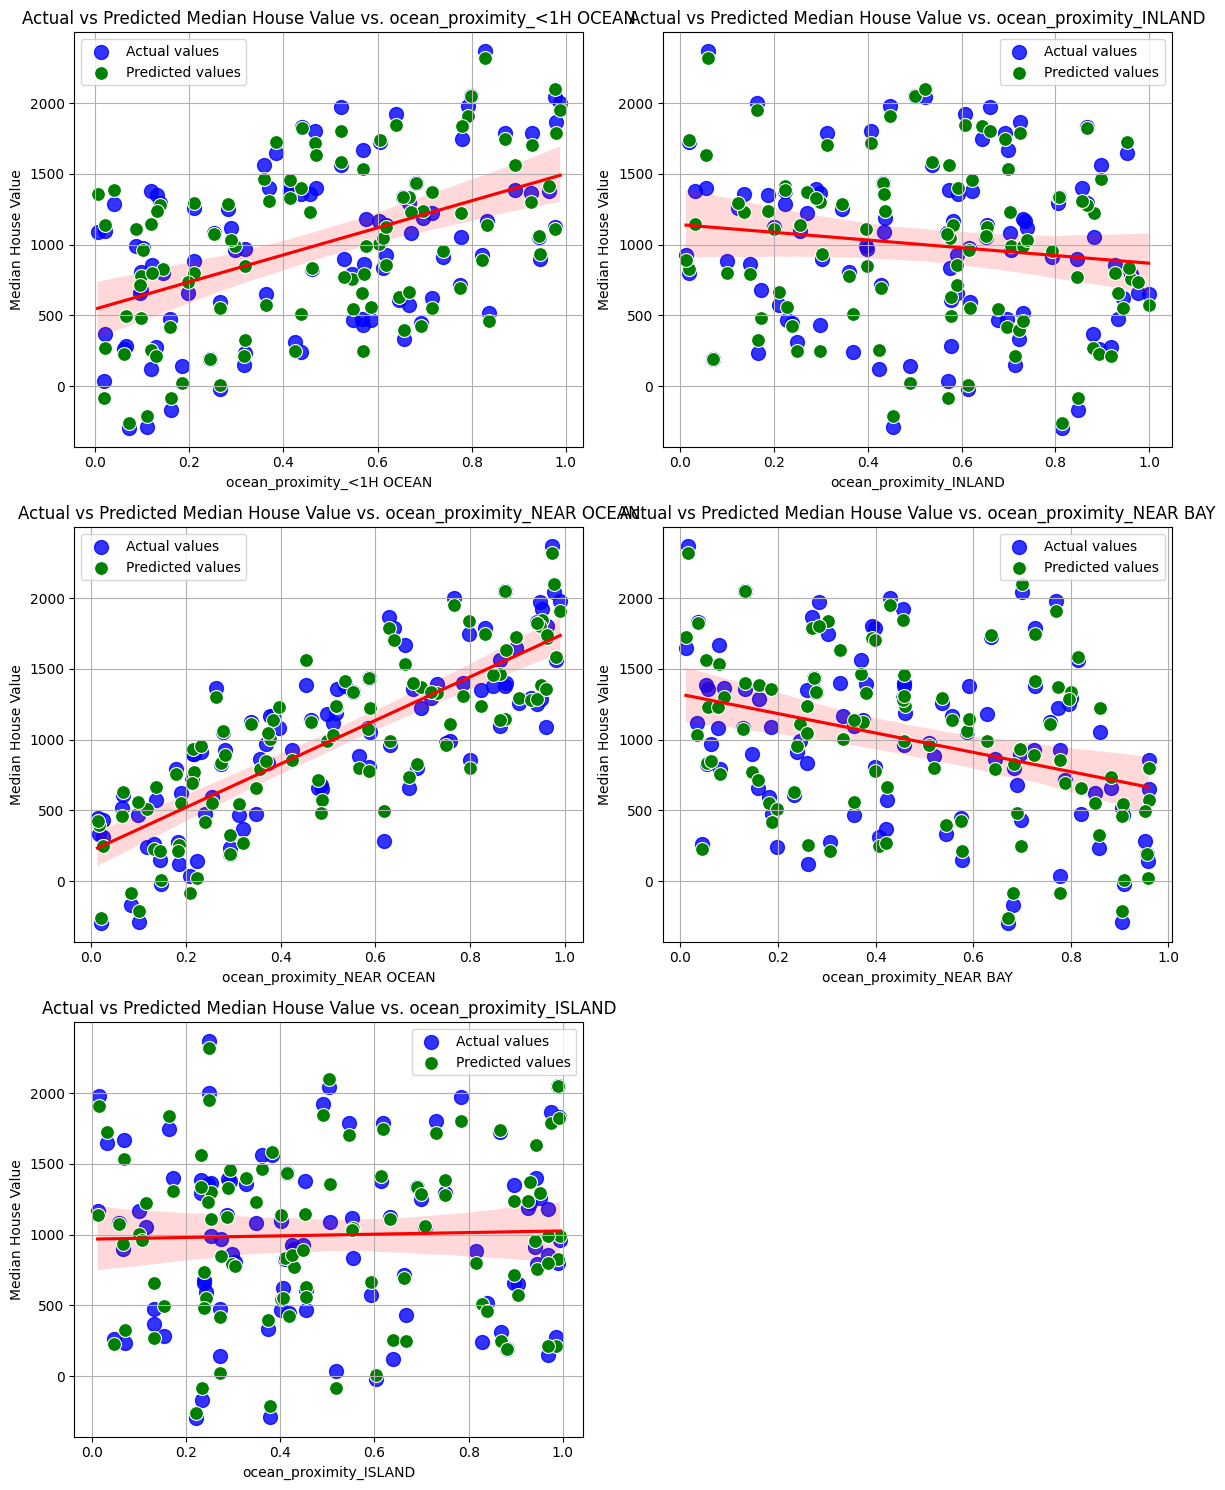

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Example Data Preparation (replace with actual data)
np.random.seed(0)
# Assuming `ocean_proximity` has been one-hot encoded into 5 columns
X_train = pd.DataFrame({
    'ocean_proximity_<1H OCEAN': np.random.rand(100),
    'ocean_proximity_INLAND': np.random.rand(100),
    'ocean_proximity_NEAR OCEAN': np.random.rand(100),
    'ocean_proximity_NEAR BAY': np.random.rand(100),
    'ocean_proximity_ISLAND': np.random.rand(100)
})
y_train = (1000 * X_train['ocean_proximity_<1H OCEAN'] +
           1500 * X_train['ocean_proximity_NEAR OCEAN'] -
           500 * X_train['ocean_proximity_NEAR BAY'] +
           np.random.randn(100) * 100)

# Fit the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on train data
y_train_pred = reg.predict(X_train)

# Combine features for plotting
df_train = X_train.copy()
df_train['Median House Value'] = y_train
df_train['Prediction'] = y_train_pred

# Plotting Actual vs. Predicted Values
num_features = len(X_train.columns)
ncols = 2
nrows = int(np.ceil(num_features / ncols))

plt.figure(figsize=(12, 5 * nrows))

for idx, feature in enumerate(X_train.columns):
    plt.subplot(nrows, ncols, idx + 1)
    # Plot actual values with regression line
    sns.regplot(data=df_train, x=feature, y='Median House Value', scatter_kws={'color': 'blue', 's': 100}, line_kws={'color': 'red'}, label='Actual values')
    # Plot predicted values
    sns.scatterplot(data=df_train, x=feature, y='Prediction', color='green', marker='o', s=100, label='Predicted values')
    plt.title(f'Actual vs Predicted Median House Value vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Random Forest Demo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, y_test)

0.30011386443659505

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [2, 7, 14],
    "max_depth": [10, 20, 30],
    "max_features": [2, 4, 6]
}


grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': [2, 4, 6],
                         'n_estimators': [2, 7, 14]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test, y_test)

0.41362176355406866